In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup 
import geopandas as gpd
from prettytable import PrettyTable

In [2]:
# offical ministry of health website
url = 'https://www.mohfw.gov.in/' 

web_content = requests.get(url).content

# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

In [3]:
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 

stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5: 
        stats.append(stat)

In [4]:
# convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)

# converting the 'string' data to 'int'
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased']  = state_data['Deceased'].map(int)

In [5]:
# pretty table representation
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']), 
               sum(state_data['Deceased'])])
print(table)


+-------+-----------------------------+-----------+-----------+----------+
| Sr.No |          States/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   |        Andhra Pradesh       |    348    |     6     |    4     |
|   2   | Andaman and Nicobar Islands |     11    |     0     |    0     |
|   3   |      Arunachal Pradesh      |     1     |     0     |    0     |
|   4   |            Assam            |     29    |     0     |    0     |
|   5   |            Bihar            |     39    |     0     |    1     |
|   6   |          Chandigarh         |     18    |     7     |    0     |
|   7   |         Chhattisgarh        |     10    |     9     |    0     |
|   8   |            Delhi            |    720    |     25    |    12    |
|   9   |             Goa             |     7     |     0     |    0     |
|   10  |           Gujarat           |    241    |     26    |    17    |
|   11  |           Harya

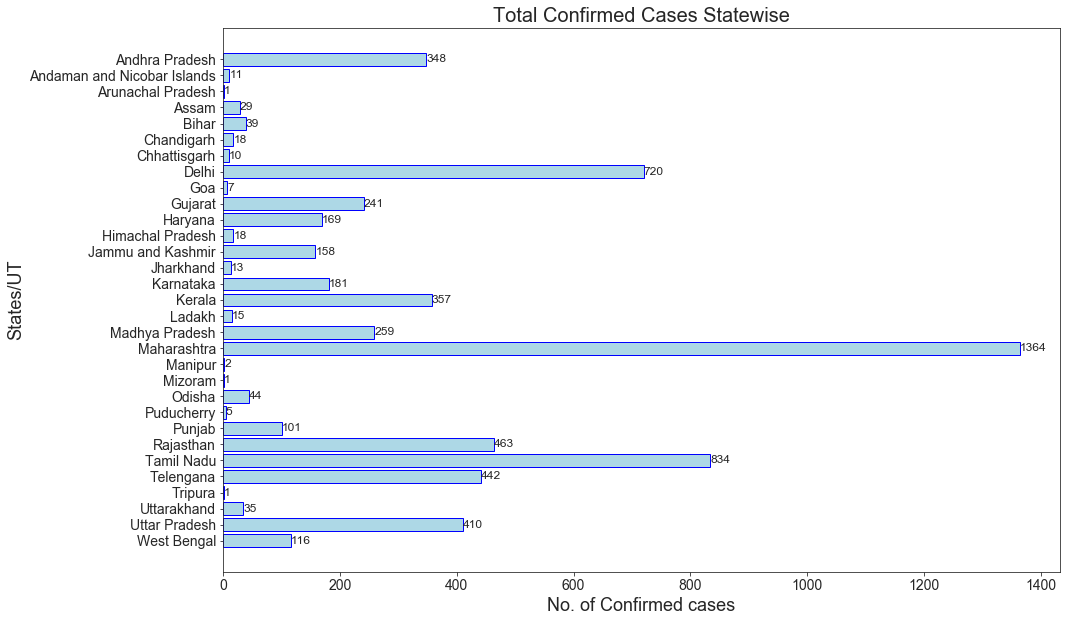

In [6]:
# barplot to show total confirmed cases Statewise 
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"], state_data["Confirmed"].map(int),
         align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis() # this is to maintain the order in which the states appear
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20)

for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12, verticalalignment = 'center')
plt.show()  

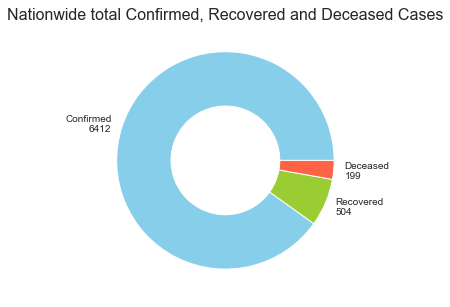

In [7]:
# donut chart representing nationwide total confirmed, cured and deceased cases
group_size = [sum(state_data['Confirmed']), 
              sum(state_data['Recovered']), 
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])), 
                'Recovered\n' + str(sum(state_data['Recovered'])), 
                'Deceased\n'  + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']

plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)
plt.show()

In [8]:
# read the state wise shapefile of India in a GeoDataFrame and preview it
map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [10]:
map_data["States/UT"]

0     Andaman & Nicobar Island
1           Arunanchal Pradesh
2                        Assam
3                        Bihar
4                   Chandigarh
5                 Chhattisgarh
6       Dadara & Nagar Havelli
7                  Daman & Diu
8                          Goa
9                      Gujarat
10                     Haryana
11            Himachal Pradesh
12             Jammu & Kashmir
13                   Jharkhand
14                   Karnataka
15                      Kerala
16                 Lakshadweep
17              Madhya Pradesh
18                 Maharashtra
19                     Manipur
20                   Meghalaya
21                     Mizoram
22                    Nagaland
23                NCT of Delhi
24                  Puducherry
25                      Punjab
26                   Rajasthan
27                      Sikkim
28                  Tamil Nadu
29                   Telangana
30                     Tripura
31               Uttar Pradesh
32      

In [11]:
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

In [12]:
map_data["States/UT"]

0     Andaman and Nicobar Island
1              Arunachal Pradesh
2                          Assam
3                          Bihar
4                     Chandigarh
5                   Chhattisgarh
6       Dadara and Nagar Havelli
7                  Daman and Diu
8                            Goa
9                        Gujarat
10                       Haryana
11              Himachal Pradesh
12             Jammu and Kashmir
13                     Jharkhand
14                     Karnataka
15                        Kerala
16                   Lakshadweep
17                Madhya Pradesh
18                   Maharashtra
19                       Manipur
20                     Meghalaya
21                       Mizoram
22                      Nagaland
23                         Delhi
24                    Puducherry
25                        Punjab
26                     Rajasthan
27                        Sikkim
28                    Tamil Nadu
29                     Telengana
30        

In [17]:
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data

,States/UT,geometry,Confirmed,Recovered,Deceased
0,Andaman and Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.0,0.0,0.0
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.0,0.0,0.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",29.0,0.0,0.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",39.0,0.0,1.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",18.0,7.0,0.0
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",10.0,9.0,0.0
6,Dadara and Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",0.0,0.0,0.0
7,Daman and Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",0.0,0.0,0.0
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",7.0,0.0,0.0
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",241.0,26.0,17.0


In [20]:
import sys
!{sys.executable} -m pip install descartes


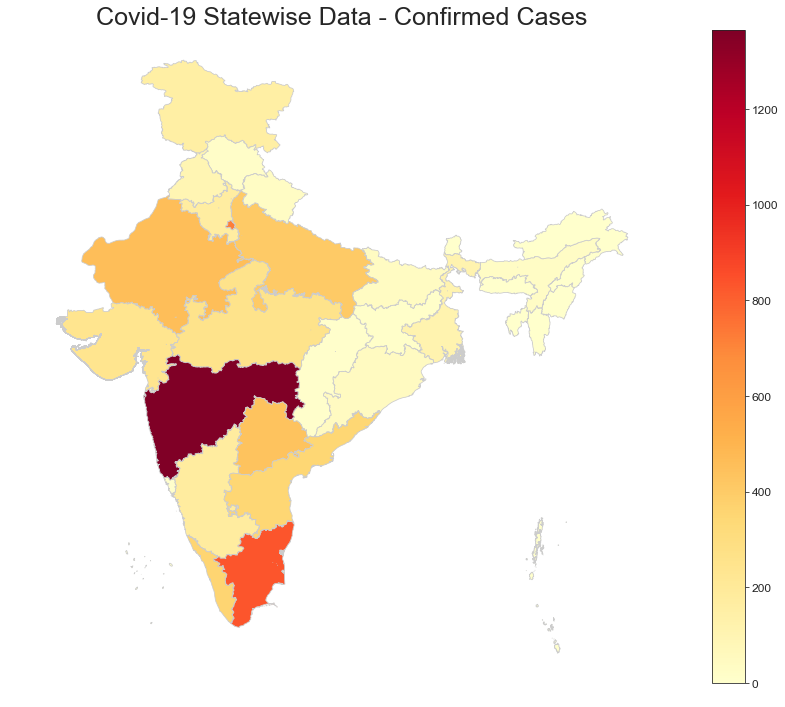

In [21]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()